In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [2]:
chunk_size = 10

In [3]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size)) + '-sonnet'
fname

'n_1r10i-sonnet'

In [4]:
import rate
rate.setkey(0,'claude')

In [5]:
source = annotate.get_clean()

In [6]:
source = source.sample(frac=1, random_state=8)

In [7]:
requests = await method.rate(source, chunk_size=chunk_size)

Request 1 of 423
Request 2 of 423
Request 3 of 423
Request 4 of 423
Request 5 of 423
Request 6 of 423
Request 7 of 423
Request 8 of 423
Request 9 of 423
Request 10 of 423
Request 11 of 423
Request 12 of 423
Request 13 of 423
Request 14 of 423
Request 15 of 423
Request 16 of 423
Request 17 of 423
Request 18 of 423
Request 19 of 423
Request 20 of 423
Request 21 of 423
Request 22 of 423
Request 23 of 423
Request 24 of 423
Request 25 of 423
Request 26 of 423
Request 27 of 423
Request 28 of 423
Request 29 of 423
Request 30 of 423
Request 31 of 423
Request 32 of 423
Request 33 of 423
Request 34 of 423
Request 35 of 423
Request 36 of 423
Request 37 of 423
Request 38 of 423
Request 39 of 423
Request 40 of 423
Request 41 of 423
Request 42 of 423
Request 43 of 423
Request 44 of 423
Request 45 of 423
Request 46 of 423
Request 47 of 423
Request 48 of 423
Request 49 of 423
Request 50 of 423
Request 51 of 423
Request 52 of 423
Request 53 of 423
Request 54 of 423
Request 55 of 423
Request 56 of 423
R

In [8]:
method.process(requests)

In [9]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [10]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [11]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.5914891386226222, pvalue=3.315213427829319e-116),
 'feasibility': SignificanceResult(statistic=0.5645517671248474, pvalue=8.617030287644084e-104),
 'value': SignificanceResult(statistic=0.3276686019639939, pvalue=5.635180324736391e-32)}

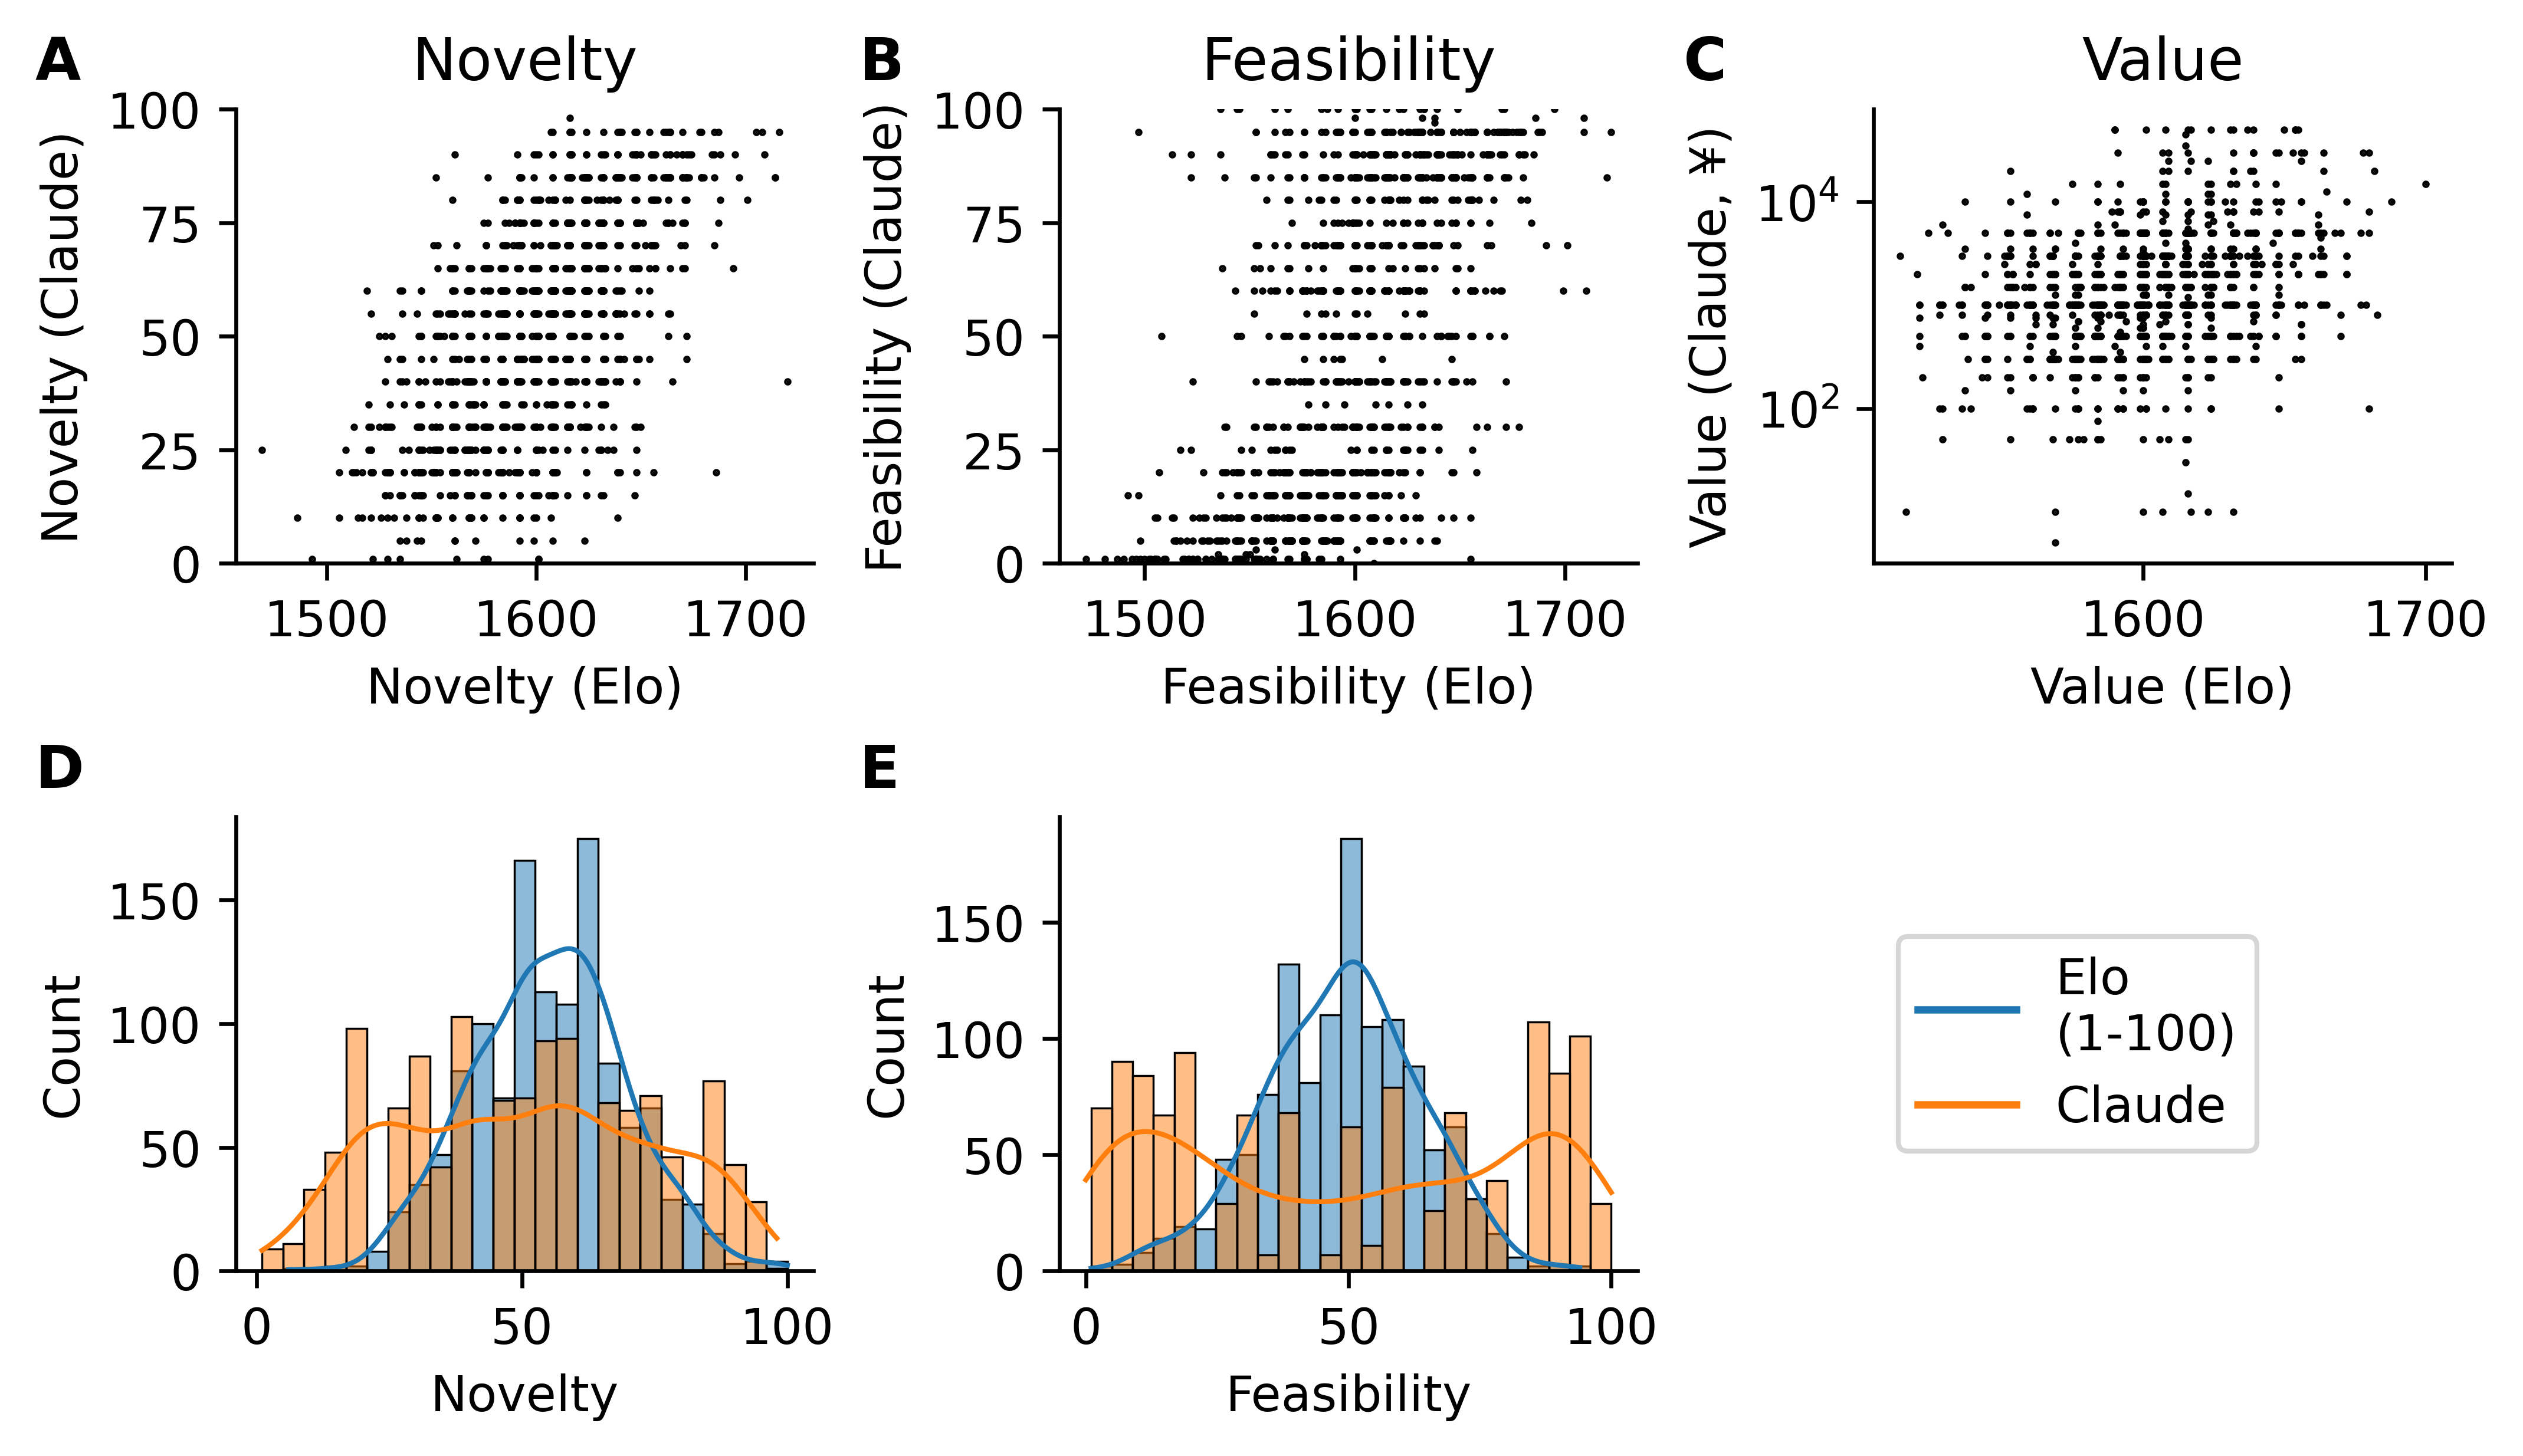

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (Claude{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='Claude')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

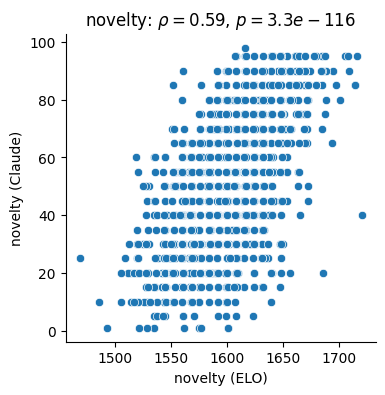

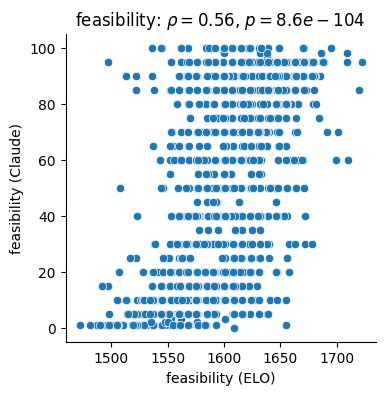

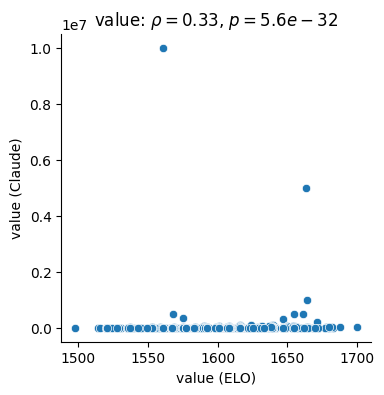

In [13]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (Claude)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

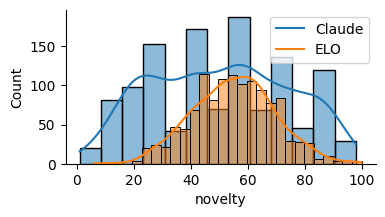

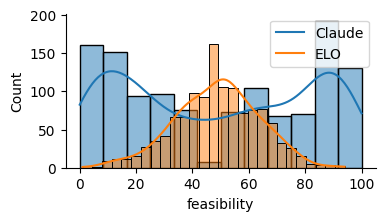

In [14]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='Claude')
    plt.plot([], label='ELO')
    plt.legend()

In [15]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [16]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

傘
パラシュート
300000
3. Using an umbrella as a parachute
Professional parachutes can cost from 200,000 to 500,000 yen

コルク
家の建築
1000000
10. Using cork in house construction
Building materials for houses can cost millions of yen

ケチャップ
道路
10000000
3. Using ketchup to pave roads
Road construction materials can cost millions of yen per kilometer

レンガ
ピザ窯
500000
4. Creating a pizza oven using bricks.
Commercial brick pizza ovens can range from 100,000 to several million yen.

ケチャップ
遊具
500000
5. Using ketchup in playground equipment
Playground equipment can range from 100,000 to several million yen

レンガ
家
5000000
8. Using bricks to build a house or shelter.
The value of bricks for an entire house would be substantial, ranging from 1 to 10 million yen.

ビー玉
パチンコ
350000
2. Using marbles in pachinko machines
Pachinko machines using metal balls cost around 200,000 to 500,000 yen

コイン
シャンデリア
200000
5. Creating a chandelier using coins as decorative elements.
Designer chandeliers can range from 50,000

Text(0.5, 1.0, 'value: $\\rho = 0.3$, $p = 9.5e-27$')

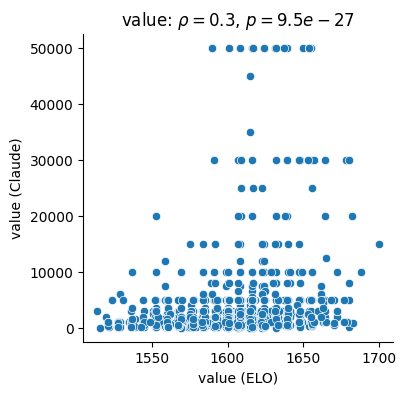

In [17]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (Claude)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [18]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

3. Using a ballpoint pen as a refrigerator
This idea is highly unconventional and surprising, as it suggests a drastic change in scale and function, making it stand out among other alternative uses.
{"novelty":95}
